In [1]:
# 201904010 박범찬입니다.
# 멋진 코딩러들만 이해한다는 머신러닝... 지금 시작하시죠!

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

bumchan = pd.read_excel("C:\Users\user\MachineLearning\MachineLearning_Bumchan\MachineClassStudy\titanic\Car_sales.csv")
bumchan

,Gender,Age,Smoker,HowLong,Cigarettes,Height,Waist,Hips,Weight
0,F,40,no,0,0,165.0,95.0,90.0,72.0
1,M,37,no,0,0,192.0,97.0,87.0,107.0
2,F,35,yes,28,15,175.0,70.0,80.0,65.0
3,M,61,no,0,0,187.5,105.0,87.5,95.0
4,F,60,yes,42,20,173.0,77.5,72.5,60.0
...,...,...,...,...,...,...,...,...,...
94,F,18,no,0,0,165.0,80.0,100.0,73.0
95,F,17,no,0,0,167.0,83.0,103.0,78.0
96,F,20,no,0,0,183.0,80.0,89.0,65.0
97,F,23,yes,7,15,173.0,90.0,100.0,80.0


In [2]:
# 1. 파일을 읽고 데이터 앞부분 10행을 출력하는 코드
bumchan.head(10)

,Gender,Age,Smoker,HowLong,Cigarettes,Height,Waist,Hips,Weight
0,F,40,no,0,0,165.0,95.0,90.0,72.0
1,M,37,no,0,0,192.0,97.0,87.0,107.0
2,F,35,yes,28,15,175.0,70.0,80.0,65.0
3,M,61,no,0,0,187.5,105.0,87.5,95.0
4,F,60,yes,42,20,173.0,77.5,72.5,60.0
5,F,17,no,0,0,165.0,75.0,82.5,60.0
6,F,23,no,0,0,168.0,80.0,100.0,80.0
7,M,63,no,0,0,178.0,97.5,105.0,87.0
8,M,41,no,0,0,175.0,85.0,85.0,80.0
9,M,17,yes,3,11,185.0,76.0,90.0,79.5


In [3]:
# 2. 남자의 수와 여자의 수를 각각 구하는 코드

# bumchan.groupby("Gender")["Gender"].count()
bumchan.groupby("Gender").size()

Gender
F    41
M    58
dtype: int64

In [4]:
# 3-1. 흡연자의 수 구하는 코드
bumchan.groupby("Smoker")["Smoker"].count()

Smoker
no     62
yes    37
Name: Smoker, dtype: int64

In [5]:
# 3-2. 흡연자의 비율 구하는 코드
# bumchan.groupby("Smoker")["Smoker"].count() / 99

pd.get_dummies(bumchan["Smoker"]).agg(np.mean)

no     0.626263
yes    0.373737
dtype: float64

In [6]:
# 4. 성별에 따른 흡연자의 흡연기간에 대한 평균을 구하는 코드
bumchan.groupby(["Gender", "Smoker"])["HowLong"].mean()

Gender  Smoker
F       no         0.000000
        yes       17.000000
M       no         0.000000
        yes       10.727273
Name: HowLong, dtype: float64

In [7]:
# 5. 각 행마다 BMI를 구하여 새로운 열 "BMI"를 기존 매트릭스에 추가하는 코드
bumchan["BMI"] = bumchan["Weight"] / (bumchan["Height"] / 100) ** 2
bumchan

,Gender,Age,Smoker,HowLong,Cigarettes,Height,Waist,Hips,Weight,BMI
0,F,40,no,0,0,165.0,95.0,90.0,72.0,26.446281
1,M,37,no,0,0,192.0,97.0,87.0,107.0,29.025608
2,F,35,yes,28,15,175.0,70.0,80.0,65.0,21.224490
3,M,61,no,0,0,187.5,105.0,87.5,95.0,27.022222
4,F,60,yes,42,20,173.0,77.5,72.5,60.0,20.047446
...,...,...,...,...,...,...,...,...,...,...
94,F,18,no,0,0,165.0,80.0,100.0,73.0,26.813590
95,F,17,no,0,0,167.0,83.0,103.0,78.0,27.968016
96,F,20,no,0,0,183.0,80.0,89.0,65.0,19.409358
97,F,23,yes,7,15,173.0,90.0,100.0,80.0,26.729927


In [8]:
# 6-1. 성별에 따른 BMI의 평균을 구하는 코드
bumchan.groupby("Gender")["BMI"].mean()

Gender
F    24.964102
M    24.916288
Name: BMI, dtype: float64

In [9]:
# 6-2. 성별에 따른 BMI의 표준편차를 구하는 코드
bumchan.groupby("Gender")["BMI"].std()

Gender
F    4.672947
M    3.881596
Name: BMI, dtype: float64

<Axes: xlabel='Height', ylabel='Weight'>

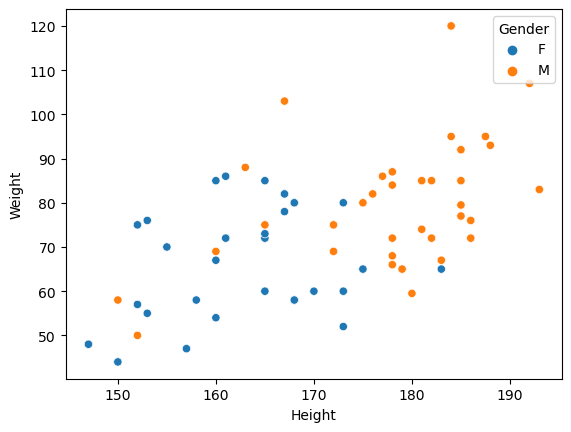

In [10]:
# 7. 성별에 따른 키와 몸무게를 산점도로 표현하는 코드

sns.scatterplot(x = "Height", y = "Weight", hue = "Gender", data = bumchan)

<Axes: xlabel='Smoker', ylabel='BMI'>

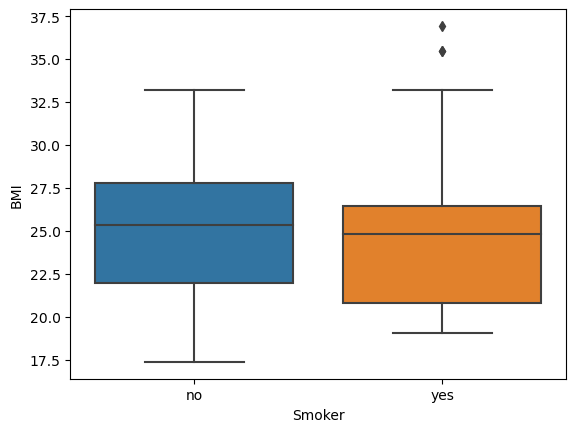

In [11]:
# 8. 흡연여부에 따른 BMI를 상자그림으로 표현하는 코드(sns.boxplot(x, y, data) 사용)
sns.boxplot(x = "Smoker", y = "BMI", data = bumchan)

In [12]:
# 9. 파일에 있는 데이터 속성을 위 표와 같이 작성하시오
df = pd.read_csv("C:\ml_res\homework\Car_sales.csv")
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [13]:
# 10. 파일을 읽고 데이터 앞부분 10행을 출력하는 코드
df.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


<Axes: xlabel='Fuel_capacity', ylabel='Fuel_efficiency'>

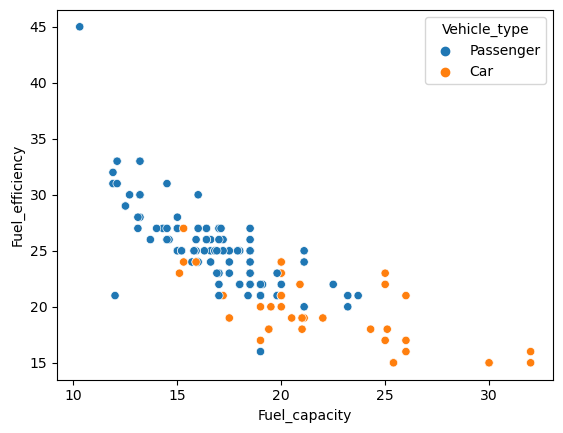

In [14]:
# 11. x축 연속형, y축 연속형으로 이루고 범주형 데이터로 그룹지어 산점도로 표현하는 코드를 작성하고 분석하시오
sns.scatterplot(x = "Fuel_capacity", y = "Fuel_efficiency", hue = "Vehicle_type", data = df)

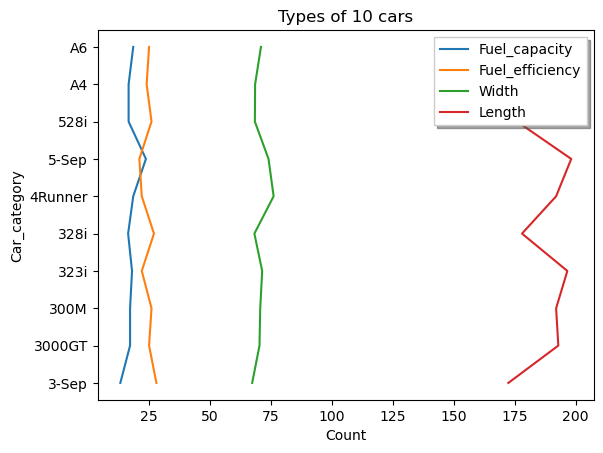

In [15]:
# 12. x축 연속형, y축으로 보여줄 연속형 데이터 열 4개를 선택하여 모두 기본 플롯으로 표현하는 코드를 작성하고 분석하시오
# (단, 한 figure에 보여주어야하며 legend, title, xlabel, ylabel 반드시 표시)

x_1 = df["Fuel_capacity"][:10]
x_2 = df["Fuel_efficiency"][:10]
x_3 = df["Width"][:10]
x_4 = df["Length"][:10]

y = sorted(df["Model"])[:10] # sorted : 오름차순으로 작은수부터 정렬

plt.plot(x_1, y, label = "Fuel_capacity")
plt.plot(x_2, y, label = "Fuel_efficiency")
plt.plot(x_3, y, label = "Width")
plt.plot(x_4, y, label = "Length")

plt.legend(shadow=True, fancybox=False, loc="upper right")
plt.title("Types of 10 cars")
plt.xlabel("Count")
plt.ylabel('Car_category')

plt.show()